In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
melbourne_file_path = r"C:\Users\Richter\source\repos\Machine Learning\melb_data.csv"

In [4]:
data = pd.read_csv(melbourne_file_path)

In [5]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [11]:
data_cleaner = data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'Price']]

In [12]:
data_cleaner.head()

,Rooms,Distance,Bathroom,Car,Landsize,YearBuilt,Price
0,2,2.5,1.0,1.0,202.0,NaN,1480000.0
1,2,2.5,1.0,0.0,156.0,1900.0,1035000.0
2,3,2.5,2.0,0.0,134.0,1900.0,1465000.0
3,3,2.5,2.0,1.0,94.0,NaN,850000.0
4,4,2.5,1.0,2.0,120.0,2014.0,1600000.0


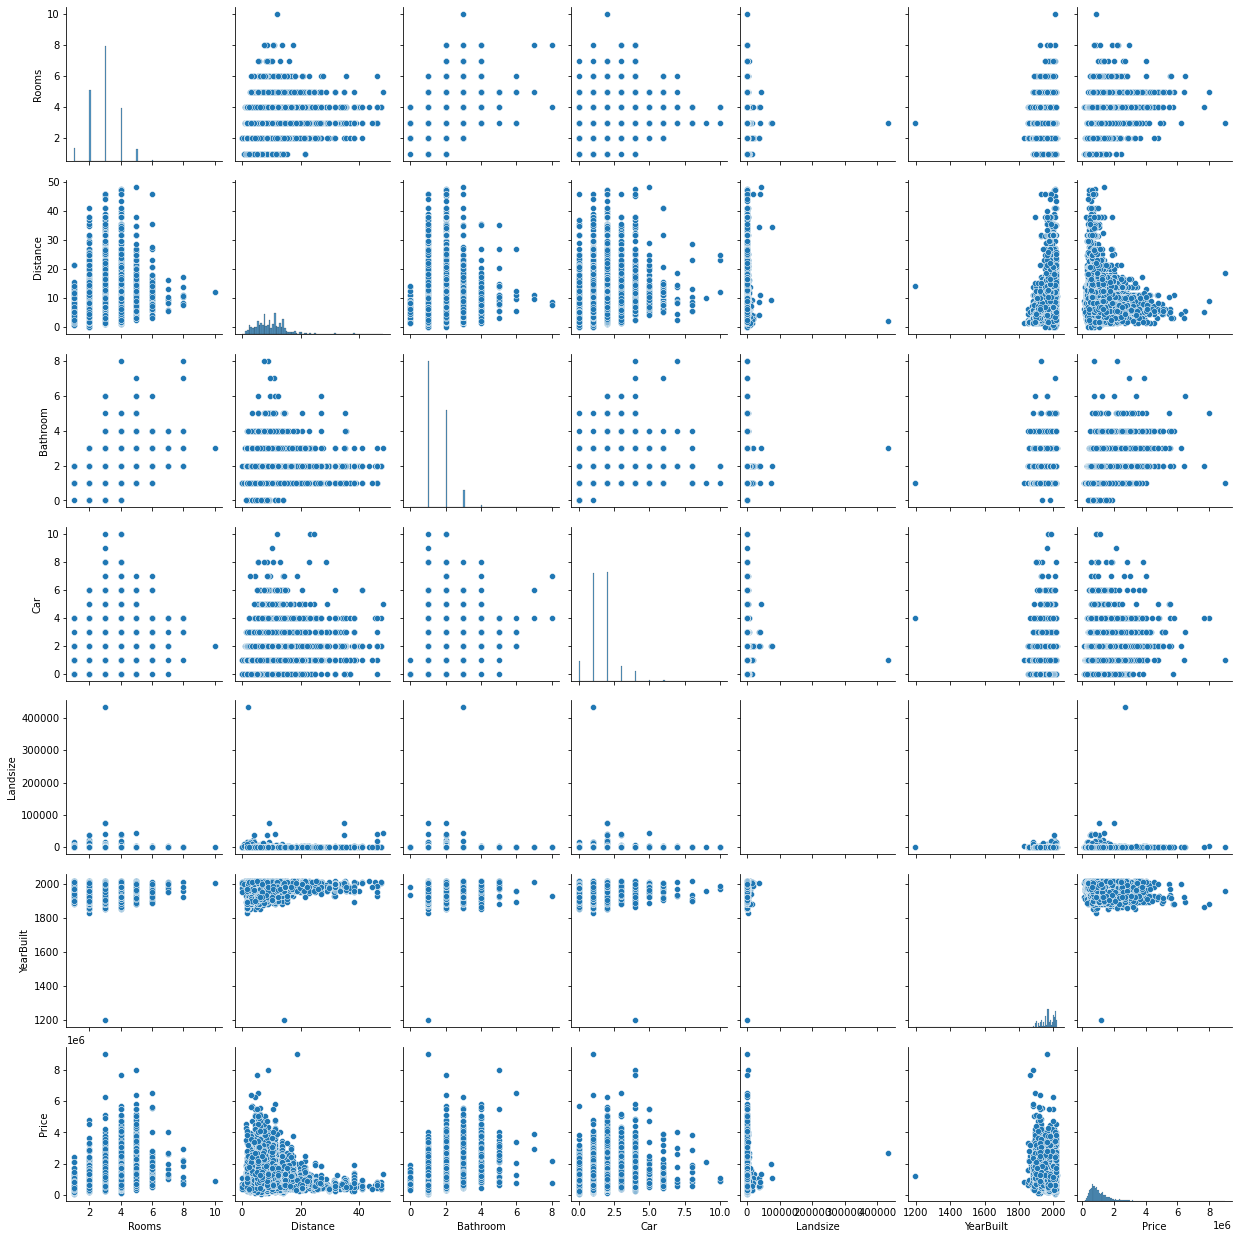

In [13]:
sns.pairplot(data_cleaner)

In [15]:
data_cleaner.corr()

,Rooms,Distance,Bathroom,Car,Landsize,YearBuilt,Price
Rooms,1.000000,0.294203,0.592934,0.408483,0.025678,-0.065413,0.496634
Distance,0.294203,1.000000,0.127155,0.262994,0.025004,0.246379,-0.162522
Bathroom,0.592934,0.127155,1.000000,0.322246,0.037130,0.152702,0.467038
Car,0.408483,0.262994,0.322246,1.000000,0.026770,0.104515,0.238979
Landsize,0.025678,0.025004,0.037130,0.026770,1.000000,0.036451,0.037507
YearBuilt,-0.065413,0.246379,0.152702,0.104515,0.036451,1.000000,-0.323617
Price,0.496634,-0.162522,0.467038,0.238979,0.037507,-0.323617,1.000000


<AxesSubplot:>

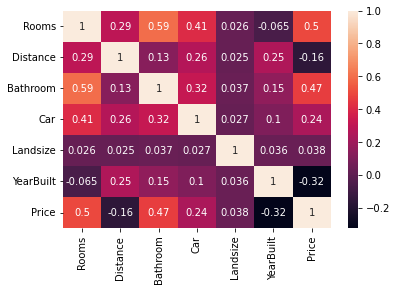

In [17]:
sns.heatmap(data_cleaner.corr(), annot = True)

In [64]:
df = data_cleaner

In [65]:
df = df.drop('YearBuilt', axis = 1)
df = df.dropna()

In [66]:
df.columns

Index(['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Price'], dtype='object')

In [67]:
X = df[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize']]

In [68]:
y = df['Price']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
df.describe()

,Rooms,Distance,Bathroom,Car,Landsize,Price
count,13518.000000,13518.000000,13518.00000,13518.000000,13518.000000,1.351800e+04
mean,2.939784,10.157827,1.53536,1.610075,558.110593,1.074796e+06
std,0.956438,5.861593,0.69231,0.962634,3998.194560,6.398586e+05
min,1.000000,0.000000,0.00000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.200000,1.00000,1.000000,178.000000,6.500000e+05
50%,3.000000,9.200000,1.00000,2.000000,442.500000,9.010000e+05
75%,3.000000,13.000000,2.00000,2.000000,651.000000,1.328000e+06
max,10.000000,48.100000,8.00000,10.000000,433014.000000,9.000000e+06


In [71]:
df.isnull().sum()

Rooms       0
Distance    0
Bathroom    0
Car         0
Landsize    0
Price       0
dtype: int64

In [72]:
df.columns

Index(['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Price'], dtype='object')

In [73]:
df = df.dropna()

In [74]:
df.isnull().sum()

Rooms       0
Distance    0
Bathroom    0
Car         0
Landsize    0
Price       0
dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10936, test_size = 0.4)

In [76]:
X.isnull().sum()

Rooms       0
Distance    0
Bathroom    0
Car         0
Landsize    0
dtype: int64

In [77]:
from sklearn.linear_model import LinearRegression


In [78]:
df_model = LinearRegression()

In [79]:
df_model.fit(X_train, y_train)

LinearRegression()

In [80]:
df_model.predict(X_test)

array([1066552.33752068, 1039603.49867899, 1436933.09855721, ...,
        848664.84548858, 1130271.14108806,  653336.87461631])

In [81]:
print(df_model.intercept_)

188663.78852903156


In [82]:
df_model.coef_

array([ 2.93320575e+05, -3.63625488e+04,  1.98469469e+05,  5.23467653e+04,
        3.28732183e+00])

In [83]:
pd.DataFrame(df_model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Rooms,293320.574683
Distance,-36362.548763
Bathroom,198469.468934
Car,52346.765339
Landsize,3.287322


In [84]:
from sklearn.metrics import mean_absolute_error

In [85]:
val_predictions = df_model.predict(X_test)

In [86]:
val_mae = mean_absolute_error(val_predictions, y_test)

In [87]:
print(val_mae)

348051.3758902627
